# Lab 3:  Assessing data and Seaborn scatterplots

We start this lab with some key questions for assessing the quality and usefulness of a data set.  We then make some very visually appealling and informative scatter plots using the [Seaborn library](http://seaborn.pydata.org).  Like the Pandas plotting functions (which is what we used in Lab 1), the Seaborn library is also built on the [MatPlotLib library](https://matplotlib.org) but has a wider variety of plots and emphasizes aesthetics.

### Section 1:  Loading the data

We will use Palmer Penguin data set introduced in 2020 by Allison Horst.  It contains information about three species of penguins found in the Palmer Archipelago in Antarctica.

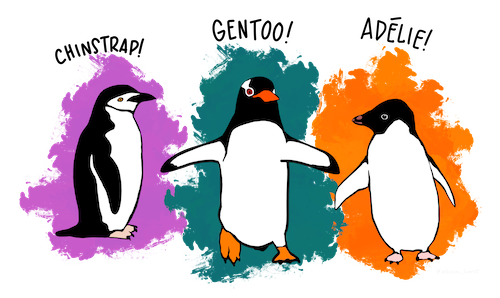

Artwork by @allison_horst

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)

The CSV file can be downloaded from [https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv](https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv) or it can be accessed directly through the Seaborn library using the following command.  This second option only works for new versions of Seaborn, and may not work if using Jupyter Hub on Lehman 360 (in which case use the link for the CSV file above).

In [2]:
penguins = sns.load_dataset("penguins")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


### Section 2:  Assessing the data

The first part of a data science project is usually a combination of Exploratory Data Analysis (EDA) and cleaning data.  *Exploratory Data Analysis* refers to exploring a data set visually, by computing statistics like the mean and variance (or other measures of center and spreaD), and by assessing and understanding the data.  *Cleaning data* refers to handling missing data (ex. by removing rows missing data), encoding dates as DateTime objects, and otherwise making the data easier to compute with.  EDA and data cleaning are usually combined, as exploring the data will reveal problems that need to be addressed (cleaned) and cleaning the data will let us make better visualizations, etc.

Over the next few labs, we will look at different elements of Exploratory Data Analysis and data cleaning.  This lab introduces 5 key questions that we should ask about any new dataset:

* What is the structure or shape of the data?
* What is the granularity of the data?
* What is the scope and completeness of the data?
* What is the temporality of the data, or how does the data relate to time?
* What is the faithfulness of the data, or how well does the data capture reality?

#### What is the structure or shape of the data?

Almost all of our data sets in MAT 328 will be tabular or rectangular (ie. with rows and columns) in shape, and saved in CSV (comma separated values) files.  We focus on rectangular data because it's easiest to work with and many data sets are rectangular, but there are other data formats, like JSON and GIS.

Our penguin data is rectangular.

The data's structure also includes what variable type each column is.  In MAT 128, we learned that data can be divided into *qualitative (categorical)* and *quantitative (numerical)* data.  Which columns in the penguin data are qualitative?  Which are quanitative?

We further learned that qualitative data can be divided into *nominal* (no ordering of the categories) and *ordinal* (categories have a natural ordering) data.  In the penguin data, which of the qualitative columns are nominal and which are ordinal?

We also learned that quantitative data can be divided into *discrete* (finite number of values or countably infinite number of values, like integers) and *continuous* (values could be measured to any number of decimal places) data.  In the penguin data, which of the quantitative columns are discrete and which are continuous?

The variable type of a column is important to know, because it tells us how we can visualize or analyze that column.  For example, we visualize the distribution of qualitative data with a bar chart and quantitative data with a histogram.

#### What is the granularity of the data?

Granularity refers to how much each data point is representing.  For example, with demographic data, each data point could represent a single person, or each data point could represent a single zip code, or each data point could represent a single city.  If the data is at the person level, that would be a fine level of granularity, while if the data was at the city level, that would be a coarse level of granularity.

Granularity is important because it limits how much insight we can get from our data.  For example, if we only have data about a city as a whole, we wouldn't be able to tell if there were differences between different neighborhoods in a single city.

What is the granularity of the penguin data?  That is, what does each row of the DataFrame represent?

####  What is the scope or completeness of the data?

This question is really asking if the data covers too much or too little compared to the questions we have.  For example, if we want to study crime in New York City but only have data about the Bronx, the data's scope is too little.  We have no information about the other boroughs.  On the other hand, if we wanted to study how well students do in data science classes at Lehman, but have data about all classes at Lehman, then our data's scope is too big.  (Though if the data's scope is too big, we can often filter it to just the data we want.)  A final possibility is that the data is completely mismatched with our question.  For example, we are interested in bikeshare usage in New York City but only have data about bikeshare usage in Boston.  But if there wasn't already a bike share in NYC, then the only way to get information about who might use it, etc. would be from other cities.

The penguin data was collected for three species of penguins (Adelie, Gentoo, and Chinstrap) observed on three different islands (Biscoe, Dream, and Torgersen) in the Palmer archipelago.  What is a question where the scope of this data is too small?  And what is a question where the scope of this data is larger than we need?

#### What is the temporality of the data, or how does the data relate to time?

When did an event happen?  When was the data about the even collected and/or entered?  (These can all be different.  For example, in a car accident, there is the time the accident occured, the time the police arrived on the scene to collect data about the accident, and the time this data got entered into the system.)  

What time data do we have and what format is it in?  In the gun background data from Lab 2, we only have the year and month.  For car accident data, even if we had it to the minute, the times might be rounded to the nearest 5 minutes or estimated.  The time could also be in a different time zone. 

The penguin data was collected between 2007-2009.  Do we know which data points were collected in which year?  Does this matter?

#### What is the faithfulness of the data, or how well does the data capture reality?

Data faithfulness refers to how much we trust the data.  There are many possible data problems:
* missing data
* bad or unrealistic values (ex. in the dog license data, some of the birth years were implausible)
* errors if data entered by hand
* outliers
* mispellings
* signs of falsified data

Do you see any possible faithfulness problems in the penguin data?

### Section 3:  Missing data

The fourth row in `penguins` is missing data, so we know there is at least some missing data.  Use `.describe()` to see exactly how many values are missing from each column.

In [3]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [4]:
penguins.describe(include = ["O"])

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,Male
freq,152,168,168


Is there a lot of missing data?  Does it differ by column?

For most columns, there only seem to be two rows with missing data.  Are the same two rows missing for each column?  The fourth row of the DataFrame has all missing data.  Is there another similar row?  If so, we could remove these rows without changing the data.  

There are 11 missing rows in the `sex` column.  If the missing data is equally distributed among the different penguin species and islands, then it will not cause any *bias*, meaning our penguin sample accurately represents the penguin population. But if, for example, it is hard to identify Adelie penguins as female, and all the missing sex data is for female Adelie penguins, then our sample would not accurately represent the penguin population (because we have under-sampled female Adelie penguins), causing *bias* in the data.

To see where the missing data is, create a dataframe with only rows missing at least one value.  The filter `penguins.isna().any(axis=1)` finds all rows with at least one `NaN` (missing data) entry.

In [6]:
nan_filter = penguins.isna().any(axis=1)
penguins[nan_filter]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


Was our first assumption, that the measurement data is all missing from the same two rows, correct?

Where is the sex data missing from?  Do you think the missing sex data is evenly distributed across the DataFrame?

We will remove the two rows missing all of the measurement data, and leave the rows with only missing sex data.  We will assume that the missing sex data will not cause significant bias, although we do not know for sure that this assumption is correct.

The filter `missing_rows = penguins["bill_length_mm"].isna()` finds all rows with missing data (`NaN`) in the `bill_length_mm` column.  We then put `~` in front of the filter to switch the `Trues` and `Falses` so that we keep those rows without missing data.

In [8]:
missing_rows = penguins["bill_length_mm"].isna()
penguins2 = penguins[~ missing_rows]
penguins2

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


### Section 4: Scatterplots in Seaborn

First, let's make a scatter plot using Pandas, as we learned in MAT 128, of the bill length (x axis) versus the flipper length (y axis).

If you can't remember how to do this, see the hidden answer.

Text(0.5, 1.0, 'Bill vs. Flipper length for Palmer Achipelago penguins')

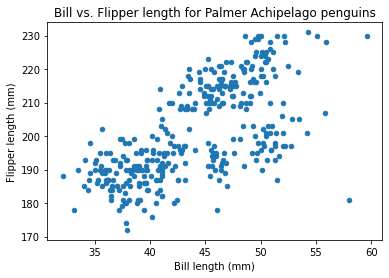

In [10]:
penguins2.plot.scatter(x = "bill_length_mm", y = "flipper_length_mm")
plt.xlabel("Bill length (mm)")
plt.ylabel("Flipper length (mm)")
plt.title("Bill vs. Flipper length for Palmer Achipelago penguins")

<details><summary>Answer:</summary>
<code>
penguins2.plot.scatter(x = "bill_length_mm", y = "flipper_length_mm")
plt.xlabel("Bill length (mm)")
plt.ylabel("Flipper length (mm)")
plt.title("Bill vs. Flipper length for Palmer Achipelago penguins")
</code>
</details>

It looks like the data might form different groups.  Unfortunately, it is tricky to color the data points by a third variable in Pandas plotting.  However it is easy in Seaborn.

To make the same plot in Seaborn with the points colored by the species, we use the code:

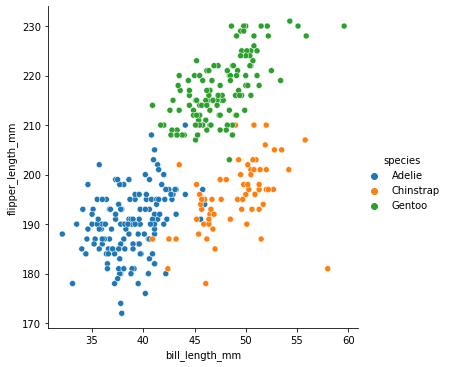

In [11]:
sns.relplot(x ="bill_length_mm", y = "flipper_length_mm", hue = "species", data = penguins2)

Is there a difference between bill and flipper length in the three different species?  Does the data group by species?

What parameter do you think colors the points by `species`?  Try removing that parameter to check if your guess is correct.

We can add the axis labels and title the same way we did for Pandas plots.  Try it below. 

Text(15.428654513888894, 0.5, 'Flipper length (mm)')

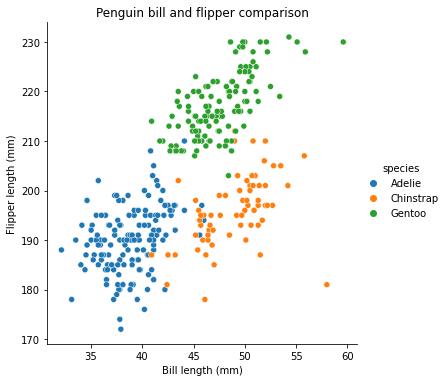

In [12]:
sns.relplot(x ="bill_length_mm", y = "flipper_length_mm", hue = "species", data = penguins2)
plt.title("Penguin bill and flipper comparison")
plt.xlabel("Bill length (mm)")
plt.ylabel("Flipper length (mm)")

Make a scatter plot using Seaborn of the bill length (x axis) and depth (y axis), colored by the island the penguin was found on.  The depth of a penguin bill is shown below.

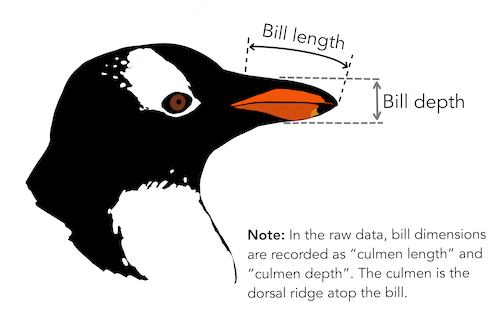

Artwork by @allison_horst

Text(0.5, 1.0, 'Penguin bill depth vs length')

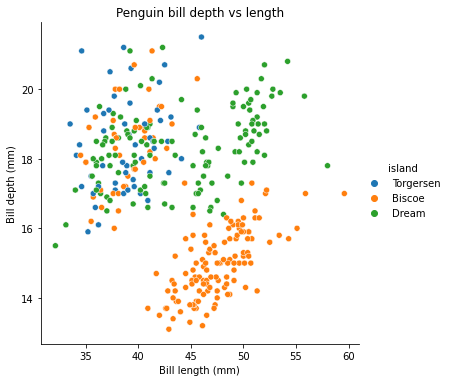

In [13]:
sns.relplot(x ="bill_length_mm", y = "bill_depth_mm", hue = "island", data = penguins2)
plt.xlabel("Bill length (mm)")
plt.ylabel("Bill depth (mm)")
plt.title("Penguin bill depth vs length")

<details><summary>Answer:</summary>
<code>
sns.relplot(x ="bill_length_mm", y = "bill_depth_mm", hue = "sex", data = penguins2)
plt.xlabel("Bill length (mm)")
plt.ylabel("Bill depth (mm)")
plt.title("Penguin bill depth vs length")
</code>
</details>

What do you notice about the plot?  Can you still see the groups by species?

It looks like there are still three groups, without explicitly coloring by species, this is harder to see.

Is there a way to show both species and sex on the plot at the same time?  Yes!  Add the parameter `style = "species"` and the data points will be drawn in a different style (ex. circle, x, square) for the different species.

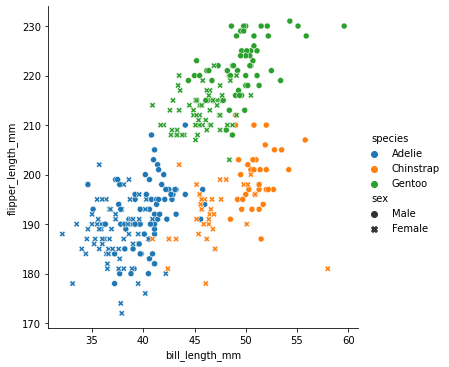

In [15]:
sns.relplot(x ="bill_length_mm", y = "flipper_length_mm", style = "sex", hue = "species", data = penguins2)

Try switching `sex` and `species` so the points are colored by the species and the style is determined by sex.

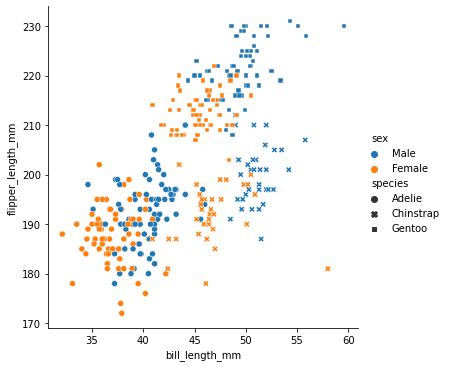

In [16]:
sns.relplot(x ="bill_length_mm", y = "flipper_length_mm", style = "species", hue = "sex", data = penguins2)

Which plot is easier to understand and interpret?

We can add even more information to the plot!  Add the parameter `size = "body_mass_g"` to the plot colored by species and styled by sex.

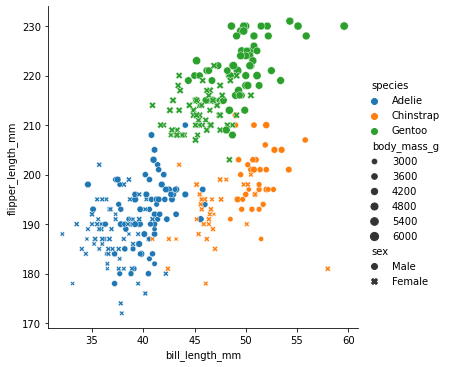

In [17]:
sns.relplot(x ="bill_length_mm", y = "flipper_length_mm", style = "sex", hue = "species", size = "body_mass_g", data = penguins2)

What do you think this new parameter does?

How easy is the graph to understand?  Do you think the new parameter helps or not?

Plot a Seaborn scatterplot of flipper length (x axis) vs. body mass (y axis), with the points colored by the species.  The size of the data points should correspond to the bill length.

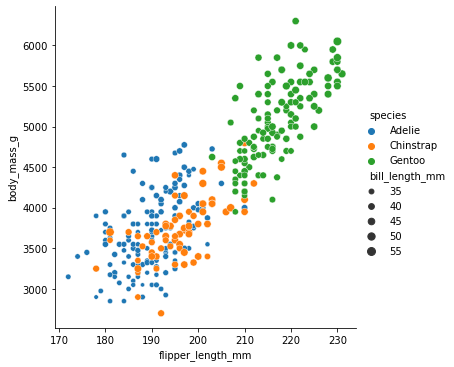

In [18]:
sns.relplot(x ="flipper_length_mm", y = "body_mass_g", size = "bill_length_mm", hue = "species", data = penguins2)

Based on the above plot, how can we distinguish between Adelie and Chinstrap penguins?

### Section 5:  All scatter plots

As seen in MAT 128, we can plot scatter plots for all pairs of quantitative variables using the single command `sns.pairplot(data = df)`, where `df` is the DataFrame.

Plot scatter plots for all pairs of quantitative variables in the penguin data.

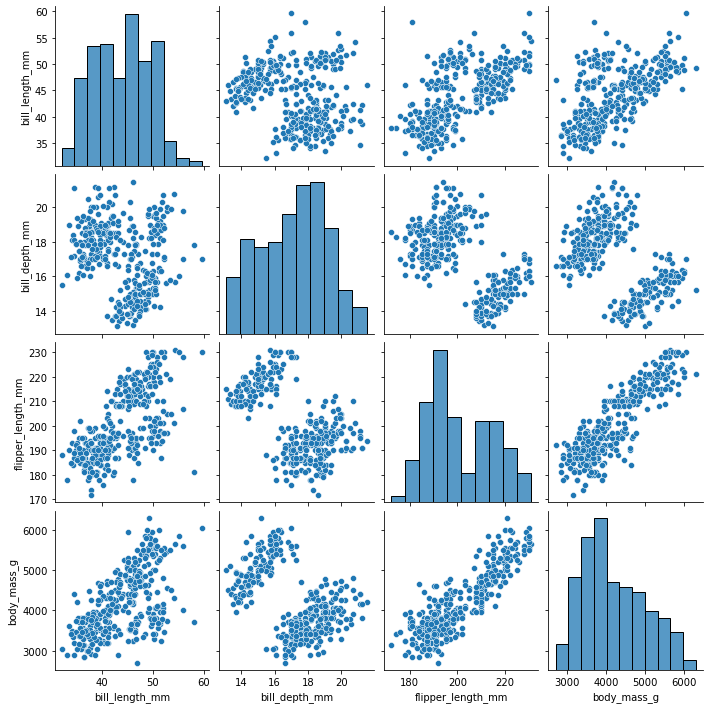

In [20]:
sns.pairplot(data = penguins2)

What is plotted on the diagonal?

Can you figure out how to color the plots with the species?

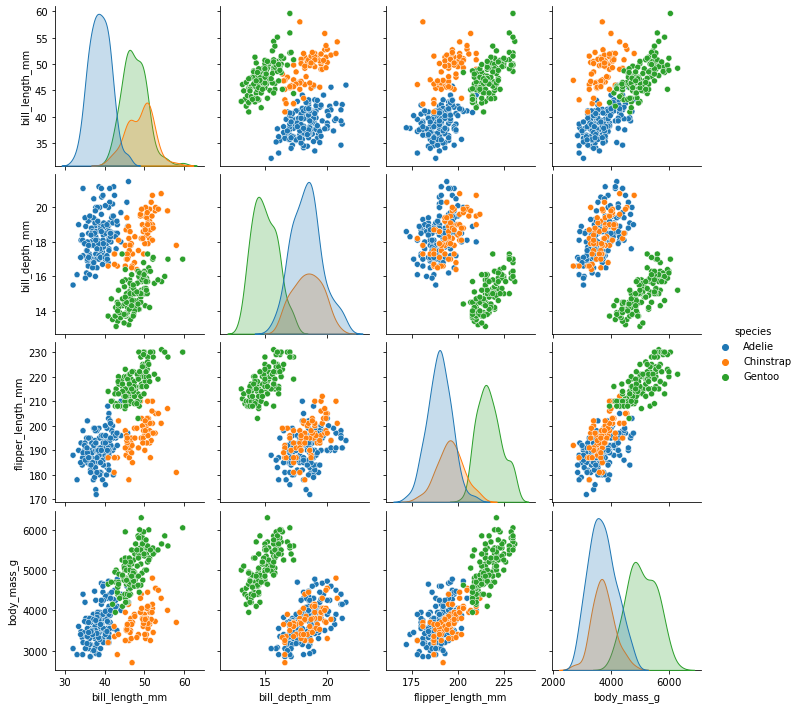

In [21]:
sns.pairplot(data = penguins2, hue = "species")

How do the diagonal plots change when you color by species?

#### Optional Challenge Problems:

- What happens if you color the plot based on a quantitative variable?  For example, try plotting bill length vs. bill depth, colored by the flipper length.
- What is the mean body mass for males and females of each species of penguin?  Hint:  You can compute these means in a single line of code by passing a list `into groupby()`.